In [85]:
print("Alipio Danilo da Silva")

Alipio Danilo da Silva


## Aula 1

In [0]:
import pandas as pd

In [87]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
# type(filmes)
filmes.columns = ["filmeId", "titulo","generos"]
filmes.head(10)
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
notas.head(10)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [88]:
notas.shape

(100836, 4)

In [89]:
len(notas)

100836

In [90]:
notas.columns = ["usuarioId", "filmeId","nota","momento"]
notas.head(10)
notas.query("filmeId==1")

notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [91]:
notas["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [92]:
notas.query("filmeId==1").describe()
notas.query("filmeId==1").mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [93]:
notas_medias_por_filme = notas.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head(10)
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [94]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## Desafio 1.1:

Encontre os 18 filmes que não tiveram avaliações.


In [167]:
filmes_com_media = filmes.join(notas_medias_por_filme,on="filmeId")
filmes_com_media.columns
bool_series = pd.isnull(filmes_com_media["nota"])
filmes_com_media[bool_series]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [168]:
filmes_sem_avaliacao = filmes_com_media['nota'].isnull()
filmes_com_media[filmes_sem_avaliacao]


0       False
1       False
2       False
3       False
4       False
        ...  
9737    False
9738    False
9739    False
9740    False
9741    False
Name: nota, Length: 9742, dtype: bool

In [97]:
filmes_com_media = filmes.join(notas_medias_por_filme,on="filmeId")
filmes_com_media.head(10)

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


## Desafio 1.2

Mudar o nome da coluna nota para média após o join.


In [98]:
#filmes_com_media.sort_values("nota", ascending=False)
filmes_com_media = filmes_com_media.rename(columns={"nota":"media"})
filmes_com_media

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


## Desafio 1.3

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de avaliações.

In [99]:
total_notas = notas.groupby('filmeId')['nota'].count()
total_notas.head(10)

filmeId
1     215
2     110
3      52
4       7
5      49
6     102
7      54
8       8
9      16
10    132
Name: nota, dtype: int64

In [100]:
#filmes_com_media_e_total = filmes_com_media.join(total_notas, on='filmeId')
#filmes_com_media_e_total.rename(columns={'nota:':'Total_Votos'}, inplace = True)

filmes_com_media = filmes_com_media.round({'media':2})
#filmes_com_media = filmes_com_media.replace("NaN",0)
#filmes_com_media = filmes_com_media.replace({None:0})

notas_com_avaliacao = notas.groupby('filmeId').size()

notas_com_avaliacao.name = 'Num_avaliacoes'

filmes_com_media_avaliacao = filmes_com_media.join(notas_com_avaliacao, on = 'filmeId')

filmes_com_media_avaliacao = filmes_com_media_avaliacao.replace({'Num_avaliacoes':{None:0}})

filmes_com_media_avaliacao.sort_values("filmeId", ascending=True)

,filmeId,titulo,generos,media,Num_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


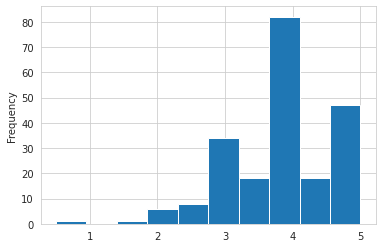

In [101]:
notas.query("filmeId == 1")["nota"].plot(kind='hist')

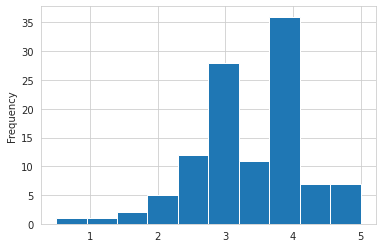

In [102]:
notas.query("filmeId == 2")["nota"].plot(kind='hist')

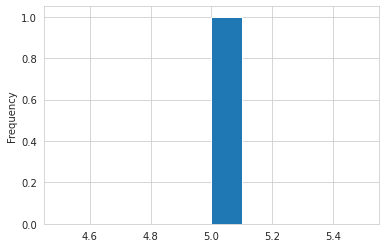

In [103]:
notas.query("filmeId == 102084")["nota"].plot(kind='hist')

## Desafio 1.4

Arredondar  para duas casas decimais a coluna notas médias.


In [104]:
filmes_com_media.round({'media':2})

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


## Desafio 1.5

Descobrir os generos dos filmes (quais são eles, únicos) --> Díficil

In [105]:
# Quantidade de generos por filme ("Filme X tem Y generos")
filmes['generos'].str.get_dummies('|').sum(axis=1)

#Filmes por quantidade de genero ("Tem tantos filmes com X generos")
filmes['generos'].str.get_dummies('|').sum(axis=1).value_counts()

# Quantidade total de filmes de cada genero separado ("Tem X filmes do genero Y")
filmes['generos'].str.get_dummies('|').sum()



(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 1.6

Contar o número de aparições de cada genero.



In [106]:
# Quantidade total de filmes de cada genero separado ("Tem X filmes do genero Y") e deixando do maior para o menos
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
#plt.show()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 1.7

Plotar gráficos de aparições por genero. Pode ser um grafico de tipo igual a barra.

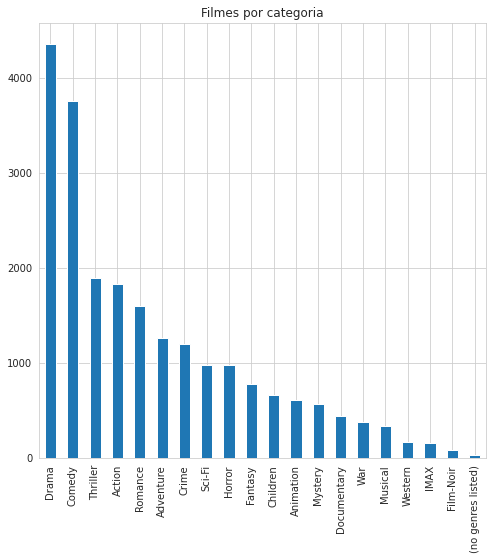

In [107]:
from matplotlib import pyplot as plt

filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind = 'bar', title = 'Filmes por categoria',figsize=(8,8))

## Aula 2

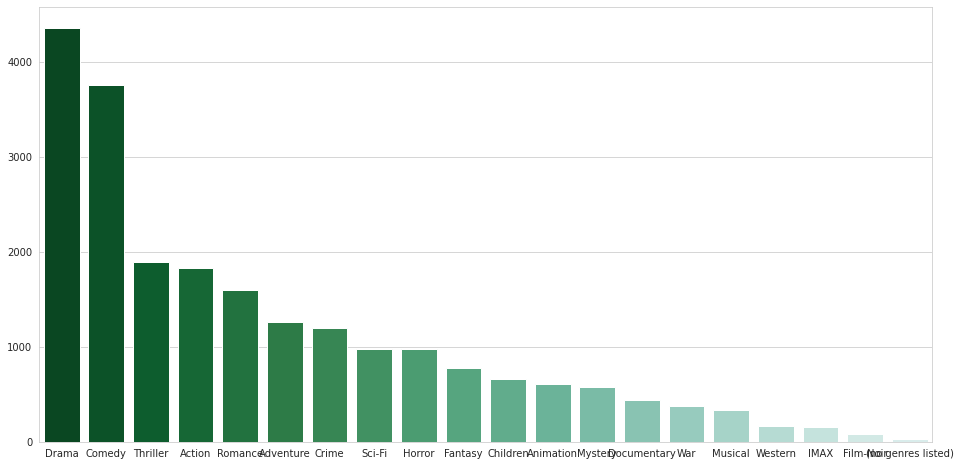

In [108]:
import seaborn as sns
sns.set_style("whitegrid")


filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending = False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+ 4))
plt.show()

3.9209302325581397


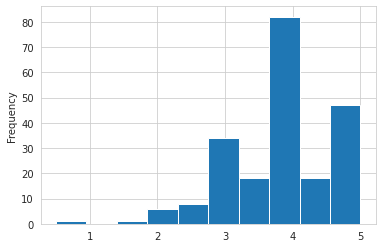

In [109]:
notas_do_filme_1 = notas.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')
#notas.query('filmeId==1')['nota'].plot(kind='hist')

3.4318181818181817


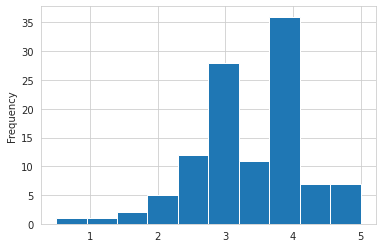

In [110]:
notas_do_filme_2 = notas.query("filmeId==2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist')
#notas.query('filmeId==1')['nota'].plot(kind='hist')


In [111]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [112]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [113]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [114]:
filmes_com_media.sort_values("media", ascending=False)[2450:2500]


,filmeId,titulo,generos,media
8765,128620,Victoria (2015),Crime|Drama|Romance,3.90
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90
5480,26258,"Topo, El (1970)",Fantasy|Western,3.90
4795,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90
5451,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90
3016,4034,Traffic (2000),Crime|Drama|Thriller,3.90
4100,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90
2894,3871,Shane (1953),Drama|Western,3.90
6580,55247,Into the Wild (2007),Action|Adventure|Drama,3.90
2156,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

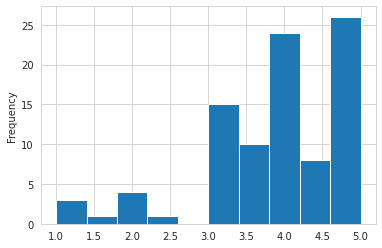

In [115]:
def plot_filme(n):
  notas_do_filme = notas.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()


plot_filme(919)
  

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

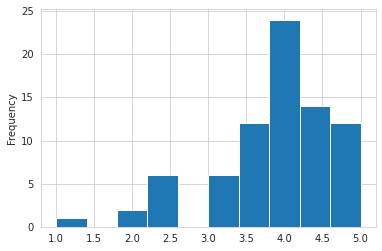

In [116]:
plot_filme(46578)

## Desafio 2.1: 

Rotacionar os thicks (os nomes dos generos)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

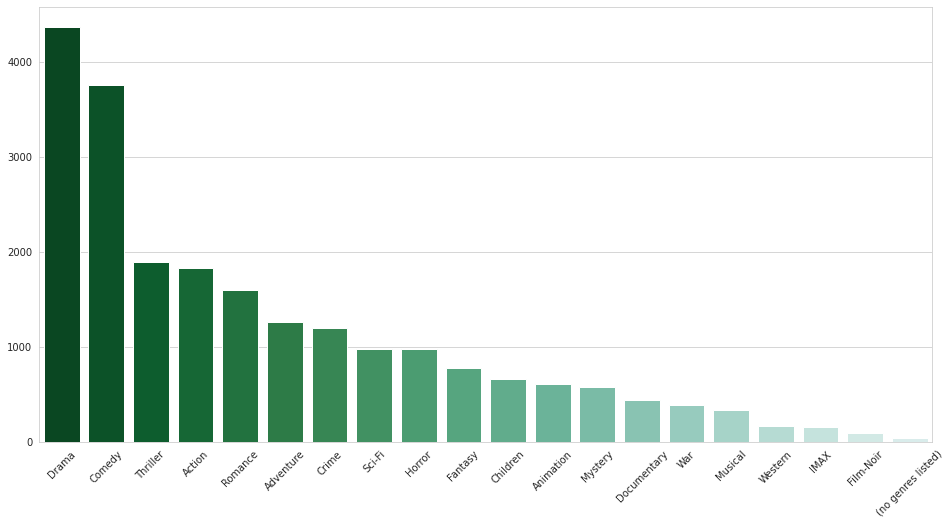

In [117]:
filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending = False)
plt.figure(figsize=(16,8))
ax=sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+ 4))

# desafio1.set_xticklabels(desafio1.get_xticklabels(),rotation=45)
#desafio1.set_xticklabels(desafio1.get_xticklabels(),rotation=45)
plt.xticks(
    rotation = 45,
    
)

## Desafio 2.2

Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.



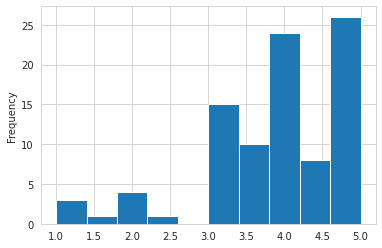

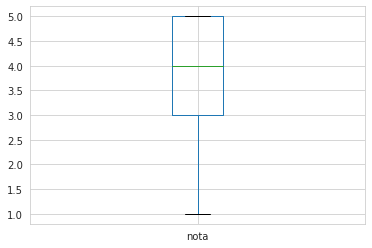

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [118]:
def boxplot_filme(n):
  notas_do_filme = notas.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()


boxplot_filme(919)

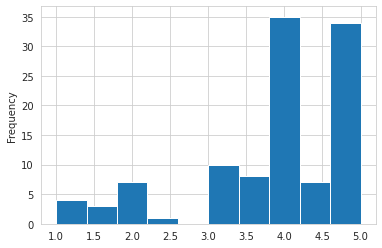

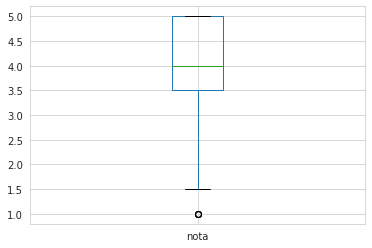

count    109.000000
mean       3.894495
std        1.103600
min        1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [119]:
boxplot_filme(924) # 2001: A Space Odyssey (1968)

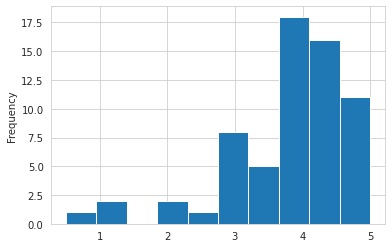

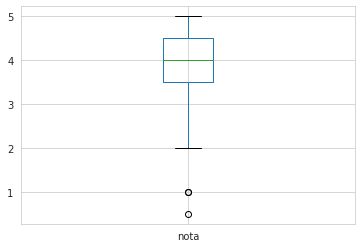

count    64.000000
mean      3.898438
std       1.008612
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [120]:
boxplot_filme(55820) # No Country for Old Men (2007)

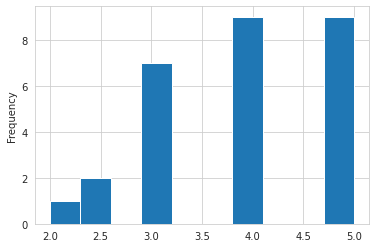

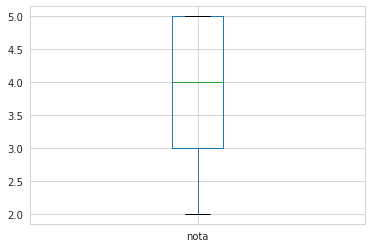

count    28.000000
mean      3.892857
std       0.946310
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [121]:
boxplot_filme(2150) # Gods Must Be Crazy, The (1980)

## Desafio 2.3
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [122]:
notas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


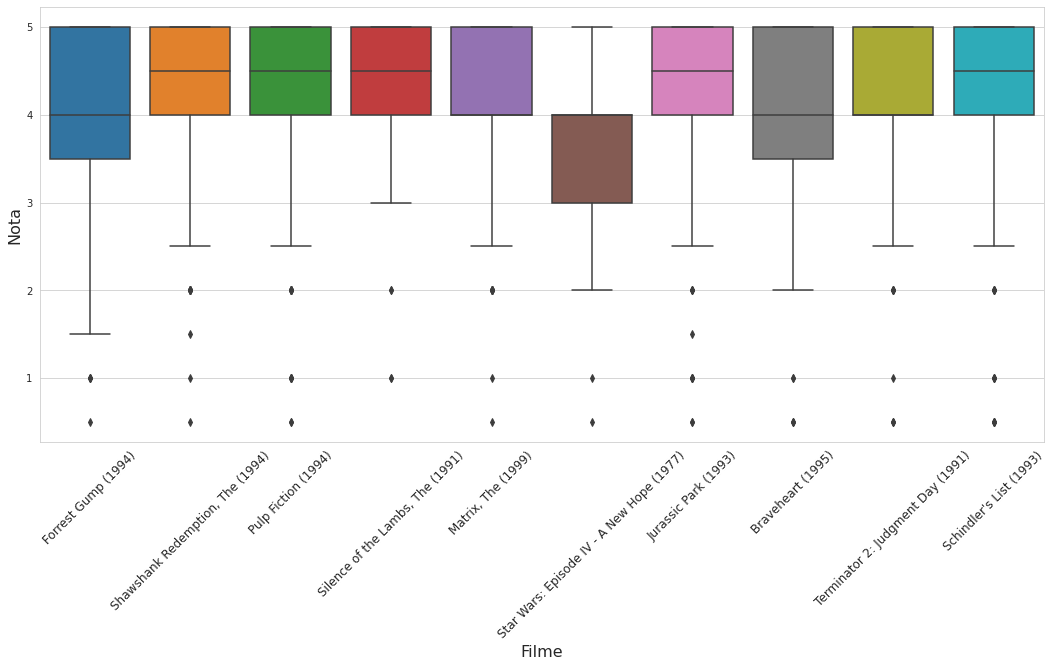

In [123]:
# filmes_com_media_e_votos vem do desafio da aula 01
top_10_votos_por_filme = filmes_com_media_avaliacao.sort_values("Num_avaliacoes", ascending=False).head(10)
top_10_votos_por_filme_titulos = top_10_votos_por_filme['titulo'].to_list()
top_10_votos_por_filme_ids = top_10_votos_por_filme['filmeId'].to_list()
notas.query(f"filmeId in {top_10_votos_por_filme_ids}")


plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=notas.query(f"filmeId in {top_10_votos_por_filme_ids}"))
ax.set_xticklabels(top_10_votos_por_filme_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()


## Desafio 2.4

O bloxplot estar num tamanho adequado e com os NOMES dos filmes nos thicks

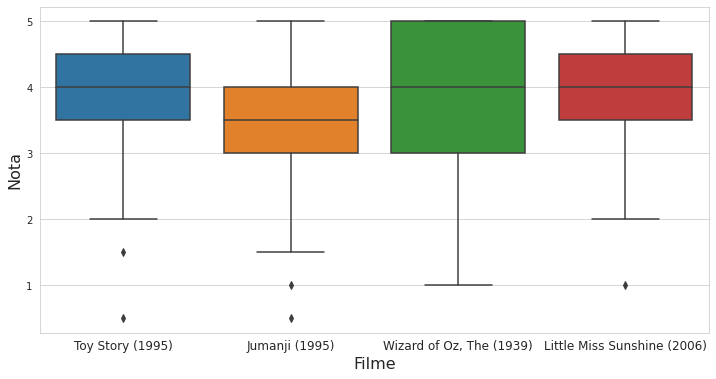

In [124]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = notas.query("filmeId in [1,2,919,46578]"), x = "filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)



plt.show()

## Desafio 2.5:

Calcular moda, média e mediana dos filmes. Tentar encontrar filmes com moda próxima de 0.5, 3 e 5.



In [0]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    avaliacao = notas.query(f'filmeId == {filme_id}')['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {avaliacao.mode().values}')    
    print(f'Média: {avaliacao.mean()}')
    print(f'Mediana: {avaliacao.median()}')
    print('------------')



In [126]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


In [127]:
explora_filme(2041)
explora_filme(7541)
explora_filme(160080)

Filme: Condorman (1981)

Moda: [4.]
Média: 3.3333333333333335
Mediana: 4.0
------------
Filme: 100 Girls (2000)

Moda: [3.5]
Média: 3.25
Mediana: 3.5
------------
Filme: Ghostbusters (2016)

Moda: [3.  3.5]
Média: 3.125
Mediana: 3.25
------------


In [128]:
explora_filme(177593)
explora_filme(1178)
explora_filme(4334)

Filme: Three Billboards Outside Ebbing, Missouri (2017)

Moda: [4.5 5. ]
Média: 4.75
Mediana: 4.75
------------
Filme: Paths of Glory (1957)

Moda: [5.]
Média: 4.541666666666667
Mediana: 4.75
------------
Filme: Yi Yi (2000)

Moda: [5.]
Média: 4.6
Mediana: 5.0
------------


## Desafio 2.6:

Plotar o boxplot e o histograma um do lado do outro (no mesmo gráfico ou em gráficos distintos)


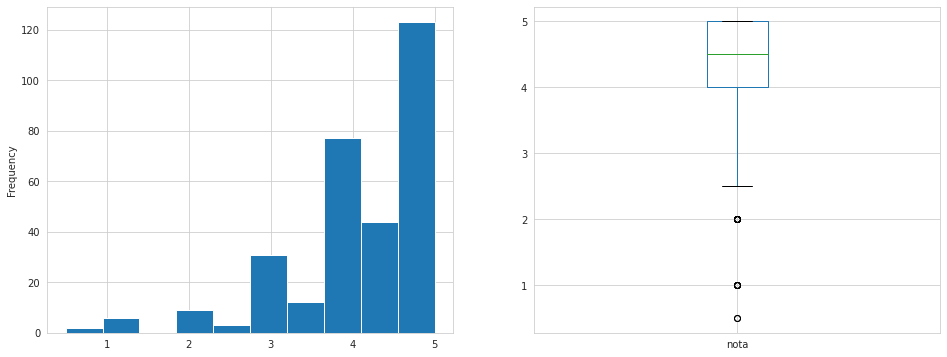

In [129]:
pulp_fiction = notas.query('filmeId == 296')['nota']
pulp_fiction 
f,axes = plt.subplots(1, 2, figsize=(16, 6))
pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1]);

## Desafio 2.7:

Gráfico de notas médias por ano.


In [130]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.sort_values('ano').head()
#top_10_votos_por_filme = filmes_com_media_avaliacao.sort_values("Num_avaliacoes", ascending=False).head(10)

,filmeId,titulo,generos,media,ano
5868,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi,3.5,1902
6355,49389,The Great Train Robbery (1903),Crime|Western,2.5,1903
9020,140541,The Electric Hotel (1908),Animation|Comedy|Sci-Fi,4.0,1908
4743,7065,"Birth of a Nation, The (1915)",Drama|War,2.0,1915
8170,102747,"Rink, The (1916)",Comedy,3.5,1916


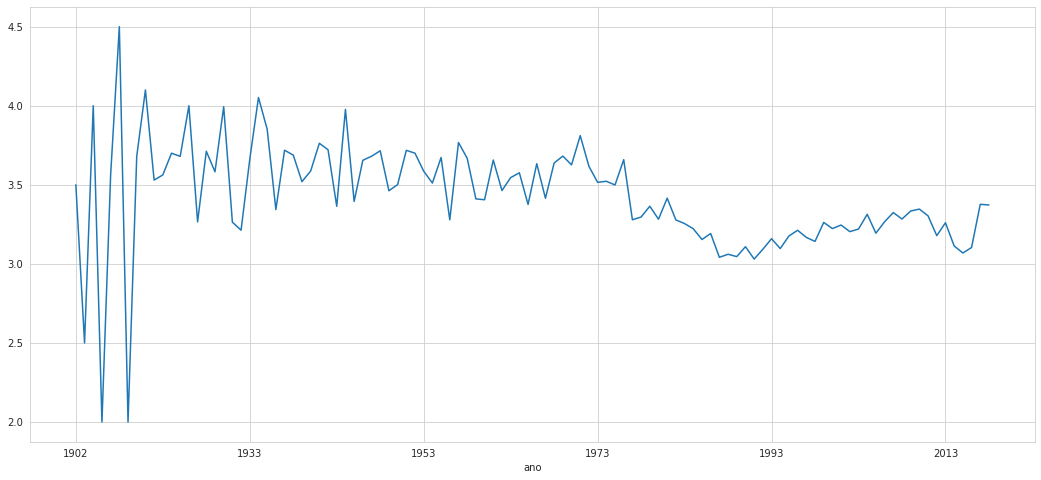

In [131]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['media'].mean()
plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()


##Aula 3

In [132]:
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [133]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [134]:
imdb['color'].value_counts(normalize = True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [135]:
imdb['director_name'].value_counts()
imdb['director_name'].value_counts().tail(40)

Tran Anh Hung          1
Dan Zukovic            1
Joe Marino             1
Benjamin Dickinson     1
Matthew R. Anderson    1
Sharron Miller         1
Blair Hayes            1
David Mirkin           1
Rob McKittrick         1
Sarah Smith            1
Christopher Morris     1
Susan Seidelman        1
James Isaac            1
Laurie Collyer         1
Kimble Rendall         1
Tom Brady              1
Paul Bunnell           1
Rich Christiano        1
Arthur Hiller          1
George Ratliff         1
Ian Iqbal Rashid       1
Randall Rubin          1
Daniel Schechter       1
John Stephenson        1
Mark Piznarski         1
Leon Ford              1
Benny Boom             1
Eric Styles            1
Majid Majidi           1
Diane English          1
Olatunde Osunsanmi     1
Phil Alden Robinson    1
Harry F. Millarde      1
Patrick Tatopoulos     1
Christopher Hutson     1
Nate Parker            1
Frédéric Auburtin      1
Jeff Crook             1
Antonio Banderas       1
Kurt Voss              1


In [136]:
imdb['num_critic_for_reviews']

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [137]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

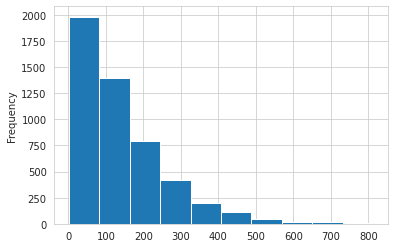

In [138]:
imdb['num_critic_for_reviews'].plot(kind = 'hist')

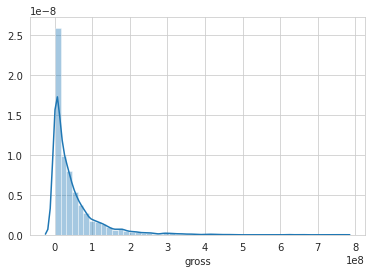

In [139]:
sns.distplot(imdb['gross'])

In [140]:
imdb.sort_values('gross',ascending=False).head()
imdb.sort_values('gross', ascending=False).sample(10)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3136,Black and White,Leon Ichaso,14.0,123.0,5.0,338.0,Clarence Williams III,556.0,18272447.0,Drama|Thriller,Khandi Alexander,Sugar Hill,3119,2149,Steve Harris,1.0,african american|harlem manhattan new york cit...,http://www.imdb.com/title/tt0107079/?ref_=fn_t...,35.0,English,USA,R,10000000.0,1993.0,475.0,5.9,1.85,331
1561,Color,Peter Howitt,90.0,90.0,29.0,142.0,Mike Doyle,638.0,17848322.0,Comedy|Romance,Frances Fisher,Laws of Attraction,18771,961,Nora Dunn,1.0,date|divorce|divorce lawyer|drinking|lawyer,http://www.imdb.com/title/tt0323033/?ref_=fn_t...,102.0,English,Ireland,PG-13,28000000.0,2004.0,160.0,5.9,2.35,702
260,Color,NaN,29.0,60.0,NaN,432.0,Dirk Benedict,669.0,NaN,Action|Adventure|Crime,George Peppard,The A-Team,25402,1655,Dwight Schultz,4.0,1980s|cult tv|famous opening theme|good versus...,http://www.imdb.com/title/tt0084967/?ref_=fn_t...,97.0,English,USA,TV-PG,NaN,NaN,554.0,7.6,4.00,0
1791,Color,Robert B. Weide,135.0,110.0,53.0,87.0,Katherine Parkinson,480.0,2775593.0,Comedy|Drama|Romance,James Corden,How to Lose Friends & Alienate People,61269,858,Fenella Woolgar,4.0,celebrity|party|pig|starlet|writer,http://www.imdb.com/title/tt0455538/?ref_=fn_t...,98.0,English,UK,R,27000000.0,2008.0,261.0,6.5,1.85,0
2533,Color,Neil Burger,236.0,110.0,168.0,96.0,Eddie Marsan,3000.0,39825798.0,Drama|Mystery|Romance|Thriller,Rufus Sewell,The Illusionist,295375,4210,Jake Wood,3.0,duchess|illusionist|magician|prince|supernatur...,http://www.imdb.com/title/tt0443543/?ref_=fn_t...,645.0,English,USA,PG-13,16000000.0,2006.0,979.0,7.6,1.85,15000
448,Color,Mike Mitchell,91.0,87.0,31.0,733.0,Jesse McCartney,1000.0,133103929.0,Adventure|Animation|Comedy|Family|Fantasy|Music,Amy Poehler,Alvin and the Chipmunks: Chipwrecked,22838,4073,Lauren Gottlieb,0.0,chipmunk|cruise ship|football ball|overboard|t...,http://www.imdb.com/title/tt1615918/?ref_=fn_t...,56.0,English,USA,G,75000000.0,2011.0,1000.0,4.4,1.85,0
3647,Color,Stefan Ruzowitzky,162.0,95.0,24.0,874.0,Olivia Wilde,16000.0,65804.0,Crime|Drama|Thriller,Charlie Hunnam,Deadfall,32512,27575,Sissy Spacek,1.0,police officer|police officer killed|police of...,http://www.imdb.com/title/tt1667310/?ref_=fn_t...,86.0,English,USA,R,12000000.0,2012.0,10000.0,6.3,2.35,0
1019,Color,Costa-Gavras,59.0,115.0,333.0,317.0,Blythe Danner,972.0,10556196.0,Crime|Drama|Thriller,Mia Kirshner,Mad City,16562,2606,William Atherton,2.0,hostage|museum|natural history museum|news rep...,http://www.imdb.com/title/tt0119592/?ref_=fn_t...,73.0,English,USA,PG-13,50000000.0,1997.0,713.0,6.2,2.35,697
5025,Color,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,Divine,Pink Flamingos,16792,760,Edith Massey,2.0,absurd humor|egg|gross out humor|lesbian|sex,http://www.imdb.com/title/tt0069089/?ref_=fn_t...,183.0,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0
3404,Color,Nigel Cole,163.0,113.0,13.0,594.0,Robbie Kay,5000.0,1094798.0,Biography|Comedy|Drama|History,Bob Hoskins,Made in Dagenham,11158,7692,Sally Hawkins,6.0,equal pay|machinist|minister|protest|sex,http://www.imdb.com/title/tt1371155/?ref_=fn_t...,73.0,English,UK,R,7200000.0,2010.0,629.0,7.2,2.35,0


# Perguntas gerais

- Filmes de Aventuras tem melhor nota que comédia?
- Diretor com mais filmes tem  nota melhor? Tem mais faturamento?
- As respostas são específicas para a amostra ou para o mundo?
- Quais correlações existem entre os dados?
- title_year com algo?


In [141]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

In [142]:
color_or_bw['color_0_ou_1'] = (color_or_bw['color'] == 'Color') *1
color_or_bw['color_0_ou_1'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    4815
0     209
Name: color_0_ou_1, dtype: int64

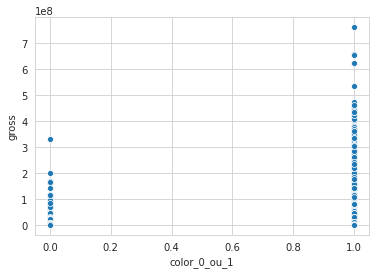

In [143]:
# Filmes coloridos vendem mais do que preto e branco?

sns.scatterplot(data=color_or_bw, x='color_0_ou_1',y='gross')


In [144]:
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [145]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

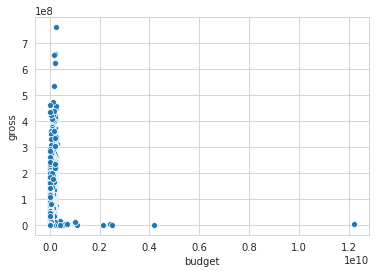

In [146]:
budgget_gross = imdb[['budget','gross']].dropna().query('budget >0 | gross > 0')
sns.scatterplot(x='budget', y='gross', data= budgget_gross)   

In [147]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


## Desafio 3.1: 
Boxplot de media do colorido e do preto e branco.

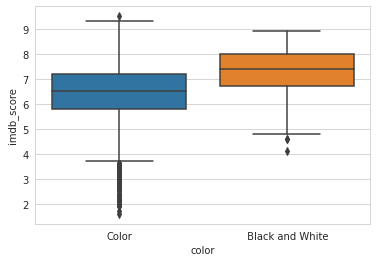

In [148]:
sns.boxplot(x='color', y='imdb_score', data=color_or_bw)

In [149]:
imdb['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [150]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [151]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values('budget', ascending=False).head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


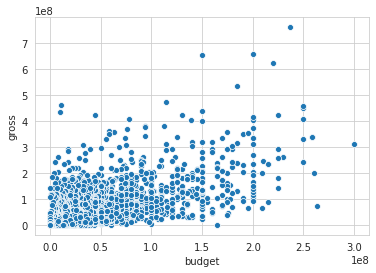

In [152]:
budgget_gross = imdb_usa[['budget','gross']].dropna().query('budget >0 | gross > 0')
sns.scatterplot(x='budget', y='gross', data= budgget_gross)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


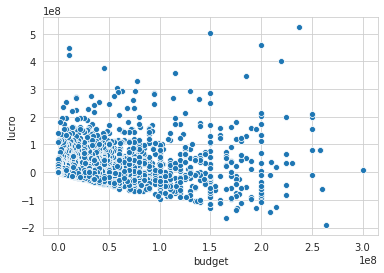

In [153]:
# lucro /prejuizo

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query('budget >0 | gross > 0')[['budget','lucro']].dropna()

sns.scatterplot(x='budget', y='lucro', data = budget_gross)

## Desafio 3.2
Quem gastou tubos e teve esse prejuizão aí próximo do 2.57



In [154]:
min_lucro = imdb_usa['lucro'].min()
imdb_usa.query(f'lucro == {min_lucro}')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


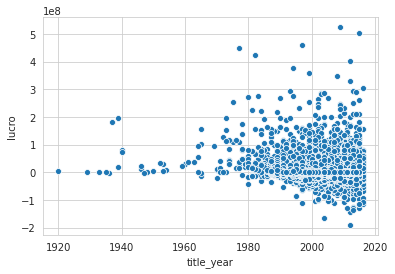

In [155]:
bugdet_gross = imdb_usa.query('budget > 0 | gross > 0')[["title_year","lucro"]].dropna()
sns.scatterplot(x='title_year',y='lucro',data= bugdet_gross)

## Desafio 3.3
Quem  são os filmes pré 2ª guerra que ganharam tanto?

In [156]:
#imdb_usa['movie_title'].query("'title_year' == 2000")
imdb_usa.query("title_year < 1940").sort_values('lucro', ascending=False).head(20)['movie_title']

3970                                  Gone with the Wind 
4449                     Snow White and the Seven Dwarfs 
4157                                    The Wizard of Oz 
4958                      Over the Hill to the Poorhouse 
4812                                 The Broadway Melody 
4706                                             Top Hat 
4786                                         42nd Street 
4427                                        Modern Times 
2904                               The Prisoner of Zenda 
3755                                  A Farewell to Arms 
3960                                       Hell's Angels 
4272                            Alexander's Ragtime Band 
4387                          You Can't Take It with You 
4404                        Mr. Smith Goes to Washington 
4508                     The Charge of the Light Brigade 
4810    Intolerance: Love's Struggle Throughout the Ages 
4824                               It Happened One Night 
4885          

In [157]:
filmes_por_diretor = imdb_usa['director_name'].value_counts()
filmes_por_diretor

Steven Spielberg     24
Martin Scorsese      20
Clint Eastwood       20
Woody Allen          18
Spike Lee            16
                     ..
Richard Loncraine     1
Walter Salles         1
Josh Boone            1
Christian Alvart      1
Brendan Malloy        1
Name: director_name, Length: 1812, dtype: int64

In [158]:
gross_director = imdb_usa[["director_name","gross"]].set_index('director_name').join(filmes_por_diretor, on='director_name')

gross_director.columns = ['dindin','filmes_irmaos']

gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


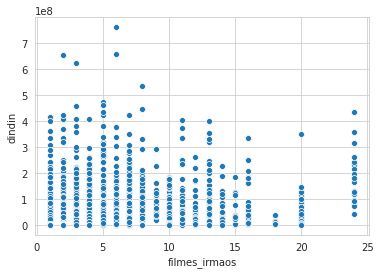

In [159]:
sns.scatterplot(x='filmes_irmaos', y='dindin', data=gross_director)

## Desafio 3.4
Descobrir qual o diretor dos filmes que estão entre 16 e 20 (a torrezinhs menor).


In [160]:
# nao eh que o kra acertou :-)
gross_director.query("filmes_irmaos > 15 & filmes_irmaos < 20").sort_values('filmes_irmaos', ascending=False)

,director_name,dindin,filmes_irmaos
2070,Woody Allen,14792779.0,18.0
1538,Woody Allen,7496522.0,18.0
2183,Woody Allen,5306447.0,18.0
2166,Woody Allen,10763469.0,18.0
2360,Woody Allen,5032496.0,18.0
2078,Woody Allen,4839383.0,18.0
1993,Woody Allen,3203044.0,18.0
1975,Woody Allen,17071230.0,18.0
1960,Woody Allen,33404871.0,18.0
1872,Woody Allen,9714482.0,18.0


## Desafio 3.5
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.


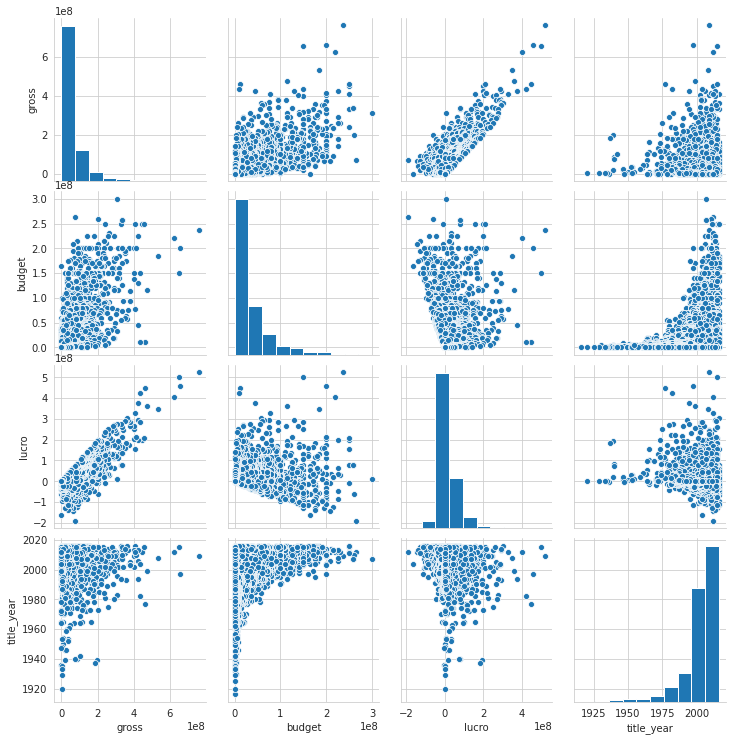

In [161]:
sns.pairplot(data= imdb_usa[['gross', 'budget','lucro','title_year']])

In [162]:
imdb_usa[['gross', 'budget','lucro','title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


## Desafio 3.6
Calcular a correlação somente para filmes depois de 2000(jogar fora os de antes de 2000) e interpretar.

In [163]:
imdb_usa.query('title_year >= 2000')[['gross', 'budget','lucro','title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


Em comparação à correlação anterior vista, para os filmes de depois de 2000 a correlação entre gross-budget e budget-lucro aumentou enquanto entre gross-lucro diminuiu, todos com pequenas margens de diferenças.

Olhando para budget-lucro, foi um aumento pequeno no valor da correlação desses filmes do imdb, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem semelhante.


## Desafio 3.7
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o execel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro).

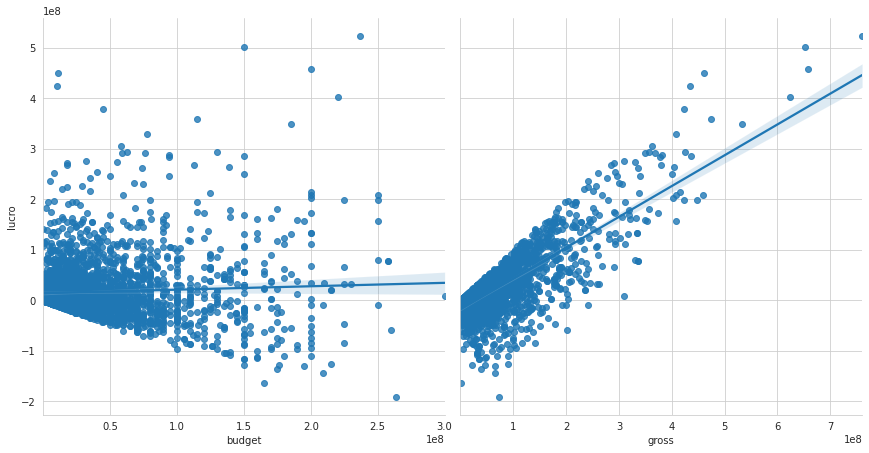

In [164]:
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

## Desafio 3.8

Utilizar também as notas nas correlações, nos gráficos.
Número de avaliações por ano pode ser também feature.

In [165]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.000000,0.645673,0.258948
budget,0.645673,1.000000,0.078936
imdb_score,0.258948,0.078936,1.000000


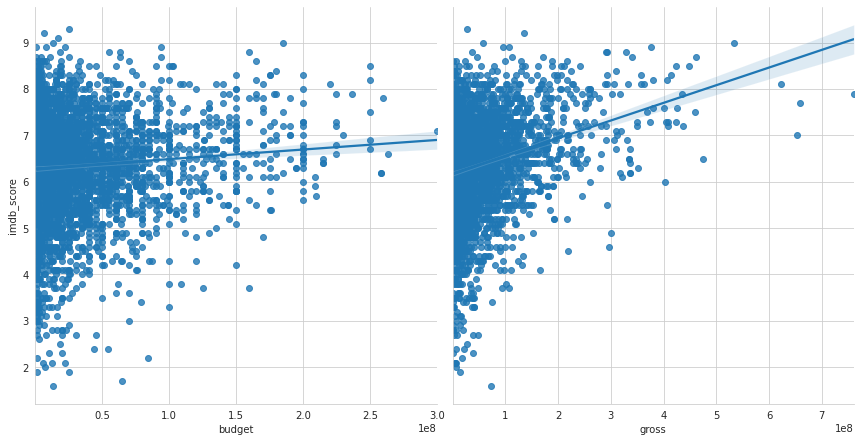

In [166]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')